=== Target ===
y_in = 0.022
y_out = 0.0022444399102224035

=== Minimum + actual liquid (solute-free) ===
V' = 97.8
L'min = 59.220000000000006
L' = 76.986
L'/V' = 0.7871779141104295
A = L'/(m V') = 1.157614579574161

=== Trays ===
Graphical N (float) = 5.365013598888135
Graphical trays (ceiling) = 6
Analytical N (float) = 5.382186497388748
Analytical trays (ceiling) = 6


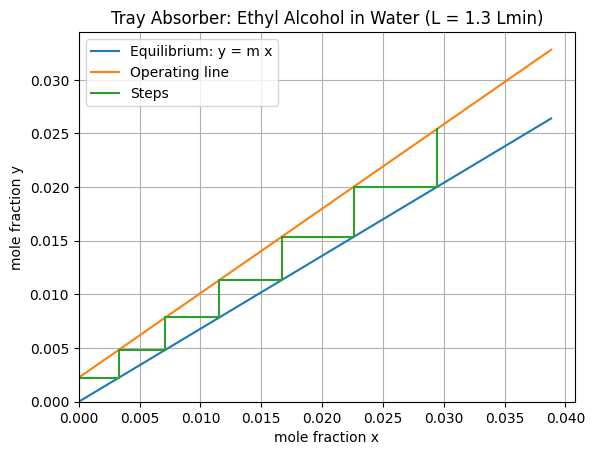

In [ ]:
# notebook cell: 22.5-2.py

import sys
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt

from bank.Absorption.tray_absorption_lmin_kremser_base import TrayAbsorberLinearEqSpec, design_tray_absorber_linear

# Given
V_in = 100.0        # kgmol/h
y_in = 0.022        # 2.2 mol% alcohol
recovery = 0.90     # remove 90% of alcohol
m = 0.68            # y = m x
x_in = 0.0          # pure water
L_factor = 1.3      # 1.3 * Lmin

spec = TrayAbsorberLinearEqSpec(
    V_in_total=V_in,
    y_in=y_in,
    m=m,
    x_in=x_in,
    recovery=recovery,
    L_factor_over_min=L_factor,
    max_trays_graphical=300,
)

res = design_tray_absorber_linear(spec)

y_out = res["target"]["y_out"]
Vp = res["solute_free"]["V_prime"]
Lminp = res["solute_free"]["Lmin_prime"]
Lp = res["solute_free"]["L_prime"]
LV = res["solute_free"]["L_over_V"]
A = res["solute_free"]["A"]

Ng = res["trays"]["graphical_N_float"]
Ng_int = res["trays"]["graphical_N_ceiling"]
Na = res["trays"]["analytical_N_float"]
Na_int = res["trays"]["analytical_N_ceiling"]

print("=== Target ===")
print("y_in =", y_in)
print("y_out =", y_out)

print("\n=== Minimum + actual liquid (solute-free) ===")
print("V' =", Vp)
print("L'min =", Lminp)
print("L' =", Lp)
print("L'/V' =", LV)
print("A = L'/(m V') =", A)

print("\n=== Trays ===")
print("Graphical N (float) =", Ng)
print("Graphical trays (ceiling) =", Ng_int)
print("Analytical N (float) =", Na)
print("Analytical trays (ceiling) =", Na_int)

# Plot equilibrium, operating line, and steps in x-y
pts = res["trays"]["graphical_step_points_xy"]
x_steps = [p[0] for p in pts]
y_steps = [p[1] for p in pts]

x_max = max(max(x_steps), (y_in / m) * 1.2)
x_grid = np.linspace(0.0, max(1e-12, x_max), 600)

y_eq = m * x_grid
y_op = y_out + LV * (x_grid - x_in)

plt.figure()
plt.plot(x_grid, y_eq, label="Equilibrium: y = m x")
plt.plot(x_grid, y_op, label="Operating line")
plt.plot(x_steps, y_steps, label="Steps")

plt.xlabel("mole fraction x")
plt.ylabel("mole fraction y")
plt.title("Tray Absorber: Ethyl Alcohol in Water (L = 1.3 Lmin)")
plt.xlim(left=0.0)
plt.ylim(bottom=0.0)
plt.grid(True)
plt.legend()
plt.show()